# correlation

In [172]:
import pandas as pd
books = pd.read_csv('books/friends_books_topics_model.csv', index_col=0)
sb = pd.read_csv('scriptbase/friends_scriptbase_topics.csv', index_col=0)
friends_no_topics = pd.read_csv('transcripts and metadata/friends_mastersheet.csv', index_col=0)

In [173]:
books.head()

,Year_of_prod,Season,Episode Number,Episode_Title,Duration,Summary,Director,Stars,Votes,match,...,t290,t291,t292,t293,t294,t295,t296,t297,t298,t299
0,1994,1,1,The One Where Monica Gets a Roommate: The Pilot,22,"Monica and the gang introduce Rachel to the ""r...",James Burrows,8.3,7440,11,...,0.000000,0.000000,0.003622,0.0,0.000000,0.000008,0.000726,0.0,0.008491,0.000010
1,1994,1,2,The One with the Sonogram at the End,22,Ross finds out his ex-wife is pregnant. Rachel...,James Burrows,8.1,4888,12,...,0.000869,0.000286,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.003331,0.000057
2,1994,1,3,The One with the Thumb,22,Monica becomes irritated when everyone likes h...,James Burrows,8.2,4605,13,...,0.003109,0.000000,0.000000,0.0,0.000000,0.000221,0.005802,0.0,0.000000,0.000000
3,1994,1,4,The One with George Stephanopoulos,22,Joey and Chandler take Ross to a hockey game t...,James Burrows,8.1,4468,14,...,0.000000,0.000058,0.000000,0.0,0.000000,0.000351,0.000000,0.0,0.021268,0.000386
4,1994,1,5,The One with the East German Laundry Detergent,22,"Eager to spend time with Rachel, Ross pretends...",Pamela Fryman,8.5,4438,15,...,0.000000,0.000694,0.000000,0.0,0.000055,0.000000,0.002872,0.0,0.007433,0.000830


## votes and stars to each other

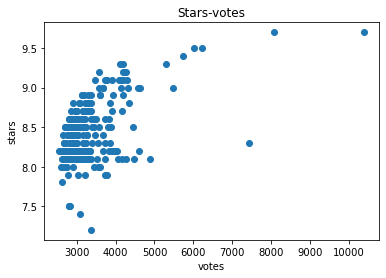

In [174]:
import matplotlib.pyplot as plot

import numpy as np

 

# Hypothetical equity returns

stars = books['Stars']
votes = books['Votes']

 

# Draw the scatter plot

plot.scatter(votes, stars)
plot.title('Stars-votes')
plot.xlabel('votes')
plot.ylabel('stars')

plot.show()

## time-based

### stars

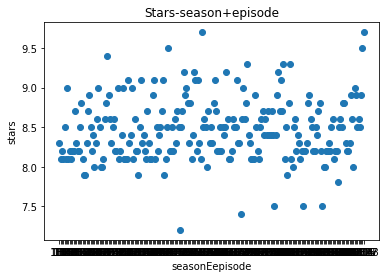

In [175]:
import matplotlib.pyplot as plot

import numpy as np


books['seasonep'] = [f'{season}E{episode}' for season, episode in zip(books['Season'], books['Episode Number'])]

# Hypothetical equity returns

stars = books['Stars']
seasonep = books['seasonep']

 

# Draw the scatter plot

plot.scatter(seasonep, stars)
plot.title('Stars-season+episode')
plot.xlabel('seasonEepisode')
plot.ylabel('stars')

plot.show()

In [176]:
from scipy.stats import spearmanr

spearmanr(seasonep, stars)

SpearmanrResult(correlation=-0.035248315095050935, pvalue=0.5900336560848645)

### votes

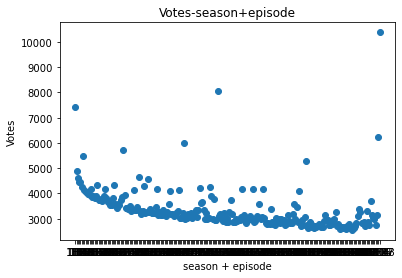

In [177]:
import matplotlib.pyplot as plt

import numpy as np


books['seasonep'] = [f'{season}E{episode}' for season, episode in zip(books['Season'], books['Episode Number'])]

# Hypothetical equity returns

Votes = books['Votes']
seasonep = books['seasonep']

 

# Draw the scatter plt

plt.scatter(seasonep, Votes)
plt.title('Votes-season+episode')
plt.xlabel('season + episode')
plt.ylabel('Votes')

plt.show()

In [178]:
from scipy.stats import spearmanr

spearmanr(seasonep, Votes)

SpearmanrResult(correlation=-0.6428331123214495, pvalue=6.554767073305174e-29)

## character centrality

In [179]:
chars = ['Monica', 'Joey', 'Chandler', 'Phoebe',
       'Ross', 'Rachel', 'Carol', 'Susan', 'Janice', 'Mike', 'Gunther', 'Ben',
       'Emily', 'Stars', 'Votes']

chardf = friends_no_topics[chars]

In [180]:
rho, pval = spearmanr(chardf)

### Stars

In [181]:
corr = pd.DataFrame(rho, columns=chardf.columns, index=chardf.columns)
pvaldf = pd.DataFrame(pval, columns=chardf.columns, index=chardf.columns)
pvald = dict(zip(chardf.columns, pvaldf['Stars']))

app = corr[['Stars', 'Votes']]

app['pval'] = [pvald[t] for t in app.index]

app['significant?'] = [True if value < 0.05 else False for value in app.pval.values]

new_rho = app.drop(columns=['Votes']).fillna(0).sort_values(by='Stars', ascending=False, key=np.abs)

new_rho[2:]


C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_24812\3286484147.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['pval'] = [pvald[t] for t in app.index]
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_24812\3286484147.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['significant?'] = [True if value < 0.05 else False for value in app.pval.values]


,Stars,pval,significant?
Ross,0.139628,0.032022,True
Monica,0.130288,0.045562,True
Mike,-0.103527,0.112687,False
Rachel,0.100668,0.123025,False
Joey,0.099939,0.125774,False
Susan,-0.083738,0.199903,False
Emily,0.081409,0.212745,False
Carol,-0.061487,0.346981,False
Gunther,-0.044769,0.493697,False
Phoebe,-0.008884,0.892014,False


### votes

In [182]:
corr = pd.DataFrame(rho, columns=chardf.columns, index=chardf.columns)
pvaldf = pd.DataFrame(pval, columns=chardf.columns, index=chardf.columns)
pvald = dict(zip(chardf.columns, pvaldf['Votes']))

app = corr[['Stars', 'Votes']]

new_rho = app.drop(columns=['Stars']).fillna(0).sort_values(by='Votes', ascending=False, key=np.abs)

new_rho['pval'] = [pvald[t] for t in new_rho.index]

new_rho['significant?'] = [True if value < 0.05 else False for value in new_rho.pval.values]

new_rho[2:]

,Votes,pval,significant?
Mike,-0.269164,0.000028,True
Susan,0.184603,0.004436,True
Joey,-0.179345,0.005728,True
Ross,0.137308,0.035017,True
Carol,0.127558,0.050327,False
Rachel,-0.111244,0.088159,False
Gunther,-0.111165,0.088386,False
Phoebe,-0.092311,0.157479,False
Ben,-0.088420,0.175807,False
Janice,0.055038,0.399978,False


## Votes and stars with topics

### preparation

In [183]:
import joblib
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

nmf_books = joblib.load('books/nmf_books_friends.sav')
# vectorizer_books = joblib.load('books/books_vectorizer.sav')
feature_names = joblib.load('books/books_features_names.sav')

# def identity(x):
#     return x

dct = {}

for topic_idx, topic in enumerate(nmf_books.components_):
    top_idxs = np.argsort(topic)[::-1][:10]
    top_words = feature_names[top_idxs]
    dct[f't{topic_idx}'] = top_words

In [184]:
to_drop = ['Year_of_prod', 'Season', 'Episode Number', 'Episode_Title', 'Duration',
       'Summary', 'Director', 'match', 'text',
       'len in words', 'len_prep', 'Monica', 'Joey', 'Chandler', 'Phoebe',
       'Ross', 'Rachel', 'Carol', 'Susan', 'Janice', 'Mike', 'Gunther', 'Ben',
       'Emily', 'seasonep']

### Books topics
#### stars

In [185]:
topics = books.drop(columns=to_drop, inplace=False)
# print(topics.columns)
rho, pval = spearmanr(topics)
corr = pd.DataFrame(rho, columns=topics.columns, index=topics.columns)
pvaldf = pd.DataFrame(pval, columns=topics.columns, index=topics.columns)
pvald = dict(zip(topics.columns, pvaldf['Stars']))

app = corr[['Stars', 'Votes']]
app['words'] = ['N/A', 'N/A'] + list(dct.values())

rho = app.drop(columns=['Votes']).fillna(0).sort_values(by='Stars', ascending=False, key=np.abs)

rho['pval'] = [pvald[t] for t in rho.index]

rho['significant?'] = [True if value < 0.05 else False for value in rho.pval.values]

rho[:52]

c:\Users\Gebruiker\anaconda3\lib\site-packages\numpy\lib\function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\Users\Gebruiker\anaconda3\lib\site-packages\numpy\lib\function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_24812\621571759.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['words'] = ['N/A', 'N/A'] + list(dct.values())


,Stars,words,pval,significant?
Stars,1.000000,N/A,0.000000e+00,True
Votes,0.428291,N/A,6.030213e-12,True
t83,-0.229353,"[letter, letters, envelope, read, write, mail,...",3.821064e-04,True
t188,-0.222429,"[job, boss, working, interview, worked, jobs, ...",5.772139e-04,True
t274,-0.199732,"[store, grocery, cart, shopping, mall, buy, ai...",2.048062e-03,True
t230,-0.192459,"[office, secretary, meeting, boss, offices, st...",2.990444e-03,True
t273,0.180944,"[minutes, hour, hours, half, couple, minute, s...",5.303317e-03,True
t204,-0.174391,"[business, company, meeting, deal, clients, co...",7.243777e-03,True
t196,-0.163971,"[planet, space, alien, universe, aliens, syste...",1.164587e-02,True
t176,-0.163634,"[books, read, reading, shelves, author, shelf,...",1.182124e-02,True


In [186]:
print(rho.index)
rho['significant?'].value_counts()

Index(['Stars', 'Votes', 't83', 't188', 't274', 't230', 't273', 't204', 't196',
       't176',
       ...
       't15', 't46', 't191', 't240', 't213', 't163', 't136', 't262', 't239',
       't36'],
      dtype='object', length=302)


False    274
True      28
Name: significant?, dtype: int64

In [187]:
sig = rho[rho['significant?'] == True]
neg = sig[sig['Stars'] < 0]
neg

,Stars,words,pval,significant?
t83,-0.229353,"[letter, letters, envelope, read, write, mail,...",0.000382,True
t188,-0.222429,"[job, boss, working, interview, worked, jobs, ...",0.000577,True
t274,-0.199732,"[store, grocery, cart, shopping, mall, buy, ai...",0.002048,True
t230,-0.192459,"[office, secretary, meeting, boss, offices, st...",0.002990,True
t204,-0.174391,"[business, company, meeting, deal, clients, co...",0.007244,True
t196,-0.163971,"[planet, space, alien, universe, aliens, syste...",0.011646,True
t176,-0.163634,"[books, read, reading, shelves, author, shelf,...",0.011821,True
t7,-0.163229,"[lot, big, nice, bit, getting, stuff, bad, lik...",0.012035,True
t120,-0.161811,"[kids, adults, candy, fun, playing, twins, par...",0.012810,True
t151,-0.160011,"[shall, great, dear, wish, poor, speak, cried,...",0.013856,True


In [188]:
sig = rho[rho['significant?'] == True]
pos = sig[sig['Stars'] > 0]
pos

,Stars,words,pval,significant?
Stars,1.000000,N/A,0.000000e+00,True
Votes,0.428291,N/A,6.030213e-12,True
t273,0.180944,"[minutes, hour, hours, half, couple, minute, s...",5.303317e-03,True
t235,0.147009,"[mirror, reflection, bathroom, makeup, image, ...",2.390266e-02,True
t80,0.138960,"[captain, pirate, general, orders, vessel, sai...",3.286203e-02,True
t115,0.137144,"[nurse, nurses, patient, patients, ward, stati...",3.523722e-02,True


#### votes

In [189]:
topics = books.drop(columns=to_drop, inplace=False)
# print(topics.columns)
rho, pval = spearmanr(topics)
corr = pd.DataFrame(rho, columns=topics.columns, index=topics.columns)
pvaldf = pd.DataFrame(pval, columns=topics.columns, index=topics.columns)
pvald = dict(zip(topics.columns, pvaldf['Votes']))

app = corr[['Stars', 'Votes']]
app['words'] = ['N/A', 'N/A'] + list(dct.values())

rho = app.drop(columns=['Stars']).fillna(0).sort_values(by='Votes', ascending=False, key=np.abs)

rho['pval'] = [pvald[t] for t in rho.index]

rho['significant?'] = [True if value < 0.05 else False for value in rho.pval.values]

rho[:52]

c:\Users\Gebruiker\anaconda3\lib\site-packages\numpy\lib\function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\Users\Gebruiker\anaconda3\lib\site-packages\numpy\lib\function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_24812\737863603.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['words'] = ['N/A', 'N/A'] + list(dct.values())


,Votes,words,pval,significant?
Votes,1.000000,N/A,0.000000e+00,True
Stars,0.428291,N/A,6.030213e-12,True
t176,-0.221887,"[books, read, reading, shelves, author, shelf,...",5.958500e-04,True
t230,-0.220741,"[office, secretary, meeting, boss, offices, st...",6.370820e-04,True
t229,0.217710,"[fish, fishing, catch, pole, hook, net, pond, ...",7.592175e-04,True
t186,0.215450,"[metal, hole, roof, machine, steel, ladder, ir...",8.639568e-04,True
t151,-0.208396,"[shall, great, dear, wish, poor, speak, cried,...",1.282477e-03,True
t30,-0.194967,"[book, author, page, reading, read, pages, cop...",2.628369e-03,True
t112,0.193697,"[grace, murmured, smile, knights, pie, insiste...",2.806359e-03,True
t221,-0.189240,"[wife, marriage, wives, bride, affair, law, so...",3.521364e-03,True


In [190]:
rho['significant?'].value_counts()

False    264
True      38
Name: significant?, dtype: int64

### scriptbase topics
#### stars

In [191]:
to_drop = ['Year_of_prod', 'Season', 'Episode Number', 'Episode_Title', 'Duration',
       'Summary', 'Director', 'match', 'text',
       'len in words', 'len_prep', 'Monica', 'Joey', 'Chandler', 'Phoebe',
       'Ross', 'Rachel', 'Carol', 'Susan', 'Janice', 'Mike', 'Gunther', 'Ben',
       'Emily']

In [192]:
import joblib
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

nmf_books = joblib.load('scriptbase/nmf_scriptbase_friends.sav')
# vectorizer_books = joblib.load('books/books_vectorizer.sav')
feature_names = joblib.load('scriptbase/sc_features_names.sav')

# def identity(x):
#     return x

dct = {}

for topic_idx, topic in enumerate(nmf_books.components_):
    top_idxs = np.argsort(topic)[::-1][:10]
    top_words = feature_names[top_idxs]
    dct[f't{topic_idx}'] = top_words

In [193]:
topics = sb.drop(columns=to_drop, inplace=False)
# print(topics.columns)
rho, pval = spearmanr(topics)
corr = pd.DataFrame(rho, columns=topics.columns, index=topics.columns)
pvaldf = pd.DataFrame(pval, columns=topics.columns, index=topics.columns)
pvald = dict(zip(topics.columns, pvaldf['Stars']))

app = corr[['Stars', 'Votes']]
app['words'] = ['N/A', 'N/A'] + list(dct.values())

rho = app.drop(columns=['Votes']).fillna(0).sort_values(by='Stars', ascending=False, key=np.abs)

rho['pval'] = [pvald[t] for t in rho.index]

rho['significant?'] = [True if value < 0.05 else False for value in rho.pval.values]

rho[:52]

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_24812\1342313842.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['words'] = ['N/A', 'N/A'] + list(dct.values())


,Stars,words,pval,significant?
Stars,1.000000,N/A,0.000000e+00,True
Votes,0.428291,N/A,6.030213e-12,True
t134,0.205305,"[bus, accident, driver, scared, road, sue, law...",1.518863e-03,True
t103,0.202862,"[pool, swim, swimming, beat, fat, fast, table,...",1.733150e-03,True
t12,0.194517,"[minutes, seconds, hours, ready, hold, hour, m...",2.690298e-03,True
t194,-0.190891,"[morning, tomorrow, today, days, yesterday, af...",3.239219e-03,True
t276,-0.183980,"[job, working, fired, quit, months, pay, easy,...",4.574023e-03,True
t35,-0.176395,"[grace, bike, flesh, neck, trunk, magazine, ey...",6.592038e-03,True
t180,-0.172214,"[store, closed, cigarettes, liquor, customers,...",8.016006e-03,True
t222,-0.171508,"[pop, bum, clean, goddamned, strangers, worry,...",8.281845e-03,True


In [194]:
rho['significant?'].value_counts()

False    274
True      28
Name: significant?, dtype: int64

In [195]:
sig = rho[rho['significant?'] == True]
neg = sig[sig['Stars'] < 0]
neg

,Stars,words,pval,significant?
t194,-0.190891,"[morning, tomorrow, today, days, yesterday, af...",0.003239,True
t276,-0.183980,"[job, working, fired, quit, months, pay, easy,...",0.004574,True
t35,-0.176395,"[grace, bike, flesh, neck, trunk, magazine, ey...",0.006592,True
t180,-0.172214,"[store, closed, cigarettes, liquor, customers,...",0.008016,True
t222,-0.171508,"[pop, bum, clean, goddamned, strangers, worry,...",0.008282,True
t32,-0.167767,"[news, network, television, week, division, ai...",0.009825,True
t191,-0.165833,"[prison, sentence, jail, crime, guards, terrif...",0.010718,True
t64,-0.155614,"[jack, hours, airport, suit, radio, snow, salt...",0.016735,True
t202,-0.155233,"[smoke, pipe, smoking, cigarette, finished, in...",0.017007,True
t288,-0.153431,"[cops, dope, jail, package, rat, mob, street, ...",0.018348,True


In [196]:
sig = rho[rho['significant?'] == True]
pos = sig[sig['Stars'] > 0]
pos 

,Stars,words,pval,significant?
Stars,1.000000,N/A,0.000000e+00,True
Votes,0.428291,N/A,6.030213e-12,True
t134,0.205305,"[bus, accident, driver, scared, road, sue, law...",1.518863e-03,True
t103,0.202862,"[pool, swim, swimming, beat, fat, fast, table,...",1.733150e-03,True
t12,0.194517,"[minutes, seconds, hours, ready, hold, hour, m...",2.690298e-03,True
t299,0.165197,"[rock, band, roll, magazine, stone, rolling, r...",1.102782e-02,True
t260,0.146702,"[shut, hurt, mouth, crazy, quiet, watch, damn,...",2.420149e-02,True
t182,0.143038,"[promise, swear, promised, word, face, scared,...",2.801834e-02,True
t165,0.141794,"[precious, rain, born, file, color, bell, read...",2.942648e-02,True
t210,0.140975,"[stupid, scared, bitch, beautiful, special, re...",3.038546e-02,True


In [197]:
# print(rho.index)

#### votes

In [198]:
topics = sb.drop(columns=to_drop, inplace=False)
# print(topics.columns)
rho, pval = spearmanr(topics)
corr = pd.DataFrame(rho, columns=topics.columns, index=topics.columns)
pvaldf = pd.DataFrame(pval, columns=topics.columns, index=topics.columns)
pvald = dict(zip(topics.columns, pvaldf['Votes']))

app = corr[['Stars', 'Votes']]
app['words'] = ['N/A', 'N/A'] + list(dct.values())

rho = app.drop(columns=['Stars']).fillna(0).sort_values(by='Votes', ascending=False, key=np.abs)

rho['pval'] = [pvald[t] for t in rho.index]

rho['significant?'] = [True if value < 0.05 else False for value in rho.pval.values]

rho[:52]

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_24812\967945941.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['words'] = ['N/A', 'N/A'] + list(dct.values())


,Votes,words,pval,significant?
Votes,1.000000,N/A,0.000000e+00,True
Stars,0.428291,N/A,6.030213e-12,True
t72,0.275277,"[general, order, strike, orders, commander, so...",1.789908e-05,True
t148,0.222461,"[butt, hole, score, monkey, unit, dammit, chic...",5.761328e-04,True
t29,-0.214526,"[book, books, read, copy, reading, library, wr...",9.105309e-04,True
t291,0.209056,"[wanna, outta, talkin, gettin, kinda, comin, d...",1.236633e-03,True
t13,-0.208700,"[baby, babies, sweet, crying, beautiful, vegas...",1.261215e-03,True
t87,-0.187766,"[child, grave, live, born, mommy, pay, home, c...",3.791650e-03,True
t26,0.187426,"[plane, flight, pilot, fly, flying, airport, l...",3.856664e-03,True
t260,0.184447,"[shut, hurt, mouth, crazy, quiet, watch, damn,...",4.470175e-03,True


In [199]:
rho['significant?'].value_counts()

False    257
True      45
Name: significant?, dtype: int64